[Описание проекта](#introduction)


1. [Чтение данных и изучение общей информации](#start)
   * [Вывод](#resume1)


2. [Подготовка данных](#preprocessing)
   * [Изменение типов даных](#change_types)
   * [Добавление данных](#addition)
   * [Расчет количества минут](#minuts)
   * [Расчет трафика](#trafic)
   * [Расчет числа сообщений](#messages)
   * [Расчет прибыли](#revenue)
   * [Вывод](#resume2)
   
    

3. [Анализ данных](#analisys)
   * [Расчет средних значений](#mean)
   * [Гистограммы](#hist)
   * [Расчет дисперсий](#sigma)
   * [Вывод](#resume4)


4. [Проверка гипотез](#tesis)
   * [Равенство среднего дохода по тарифам](#tariff)
   * [Равенство среднего дохода по регионам](#region)


5. [Заключение. Общий вывод](#resume)

#  Описание проекта
<a id="introduction"></a>


Оператор сотовой связи «Мегалайн» предполагает ввести  два тарифных плана: «Смарт» и «Ультра». Необходимо  провести по выборке из 500 пользователей  предварительный анализ тарифов на небольшой выборке клиентов для выяснения того, какой тарифный план лучше.Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

*информация о пользователях:*

* __``user_id``__ — * уникальный идентификатор пользователя*
* __``first_name``__ — *имя пользователя*
* __``last_name``__ — *фамилия пользователя*
* __``age``__ — *возраст пользователя (годы)*
* __``reg_date``__ — *дата подключения тарифа (день, месяц, год)*
*__``churn_date``__ — *дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)*
* __``city``__ — *город проживания пользователя*
* __``tariff``__ — *название тарифного плана*

*информация о звонках:*

* __``id``__ — *уникальный номер звонка*
* __``call_date``__ — * дата звонка*
* __``duration``__ — *длительность звонка в минутах*
* __``user_id``__ — *идентификатор пользователя, сделавшего звонок*

*информация о сообщениях:*

* __``id``__ — *уникальный номер сообщения*
* __``message_date``__ — *дата сообщения*
* __``user_id``__ — *идентификатор пользователя, отправившего сообщение*

*информация об интернет-сессиях:*

* __``id``__ — * уникальный номер сессии*
* __``mb_used``__ — *объём потраченного за сессию интернет-трафика (в мегабайтах)*
* __``session_date``__ — *дата интернет-сессии*
* __``user_id``__ — *идентификатор пользователя*

*информация о тарифах:

* __``tariff_name``__ — *название тарифа*
* __``rub_monthly_fee``__ — *ежемесячная абонентская плата в рублях*
* __``minutes_included``__ — *количество минут разговора в месяц, включённых в абонентскую плату*
* __``messages_included``__ — *количество сообщений в месяц, включённых в абонентскую плату*
* __``mb_per_month_included``__ — *объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)*
* __``rub_per_minute``__ — *стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)*
* __``rub_per_message``__ — *стоимость отправки сообщения сверх тарифного пакета*
* __``rub_per_gb``__ — *стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)*

# 1. Чтение данных и изучение общей информации
<a id="start"></a>

In [1]:
# Рисовать графики сразу же
%matplotlib inline 
#notebook
# импорт необходимых пакетов
import pandas as pd
import numpy as np
#import pandas_profiling
#import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from scipy import stats as st


In [2]:
# открываем датасеты
try:
    rest = pd.read_csv('d:/Home/datasets/rest_data.csv')
    calls = pd.read_csv('d:/Home/datasets/calls.csv')
    internet = pd.read_csv('d:/Home/datasets/internet.csv')
    messages = pd.read_csv('d:/Home/datasets/messages.csv')
    tariffs = pd.read_csv('d:/Home/datasets/tariffs.csv')
    users = pd.read_csv('d:/Home/datasets/users.csv')
except:
    rest = pd.read_csv('/datasets/rest_data.csv')
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

Последовательно посмотрим на все таблицы

In [3]:
calls.info()
calls[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000


In [4]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


В среднем 50% абонентов делают звонки не более 6 мин, 75% укладываютчя в 10 мин

In [5]:
internet.info()
internet[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000


In [6]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


В среднем 50% абонентов  довольствуются трафиком 350 Мб, 75% качают не более 560Мб


In [7]:
messages.info()
messages[:3]
#rint(messages.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [8]:
messages.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


Разрос не сильный по числу смс, размах 500 смс

In [9]:
tariffs.info()
tariffs[:2]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [10]:
users.info()
# сортировка фрейма данных по городу, а затем по именам
users.sort_values(["city", "last_name", "first_name"], axis=0
                  , ascending=True, inplace=True)

users[:3]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
135,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart
66,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart
253,1253,29,NaN,Астрахань,Алла,Масленникова,2018-08-06,ultra


Пропуски  признака `churn_date` могут быть связаны с тем, что  тариф еще действующий. Посмотрим пропуски по всем таблицам

In [11]:
calls.isnull().sum() 

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [12]:
internet.isnull().sum()

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [13]:
messages.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [14]:
users.isnull().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Краткая статистика о таблицах. Имеет смысл смотреть таблицы зконков и трафика интернет `calls`, `internet`

В среднем 50% абонентов делают звонки не более 6 мин, 75% укладываютчя в 10 мин

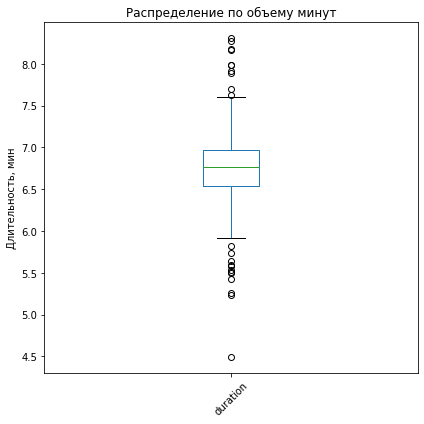

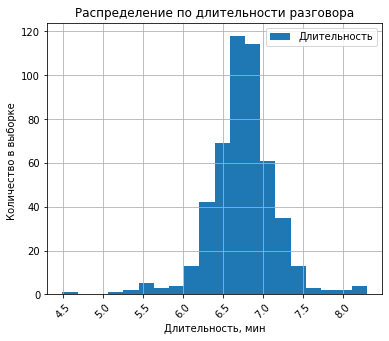

In [15]:
# Распределение по объему минут
(
    calls
        .pivot_table(index='user_id', values='duration', aggfunc='mean', fill_value=0)
        .plot
        .box(rot=45, figsize=(6,6))
);

plt.title("Распределение по объему минут");
plt.ylabel("Длительность, мин");
plt.tight_layout();
plt.show();

(
    calls
        .pivot_table(index='user_id', values='duration', aggfunc='mean', fill_value=0)
        .plot
        .hist(bins=20, rot=45, figsize=(6,5), grid=True)
);
plt.title("Распределение по длительности разговора");
plt.legend(["Длительность"]);
plt.ylabel("Количество в выборке ");
plt.xlabel("Длительность, мин");
plt.show();

Распределение нормальное. Есть выбросы. Округлим минуты разговора до ближайшего большего целого и анализ проведем для округленых значений

In [16]:
internet.describe()

,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


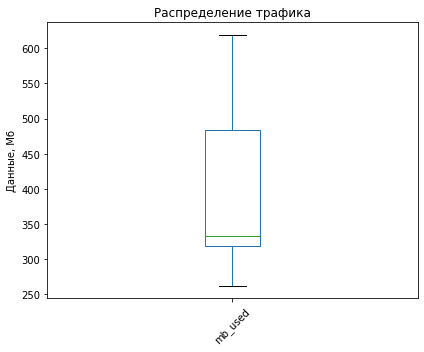

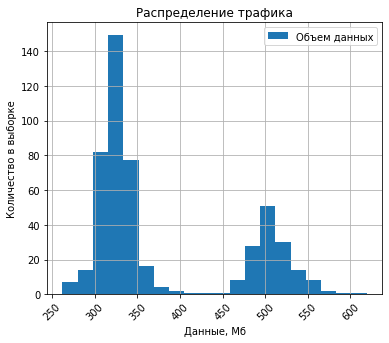

In [17]:
# Распределение по объему данных
(
    internet
        .pivot_table(index='user_id', values='mb_used', aggfunc='mean', fill_value=0)
        .plot
        .box(rot=45, figsize=(6,5))
)

plt.title("Распределение трафика");
plt.ylabel("Данные, Мб");
plt.tight_layout()
plt.show()


(
    internet
        .pivot_table(index='user_id', values='mb_used', aggfunc='mean', fill_value=0)
        .plot
        .hist(bins=20, rot=45, figsize=(6,5), grid=True)
)       
plt.title("Распределение трафика");
plt.legend(["Объем данных"]);
plt.xlabel("Данные, Мб");
plt.ylabel("Количество в выборке");
plt.show()



Половина всех пользователей, качают около 350Мб, выбросов нет, распрелеление вытянуто, у 75% пользователей трафик не превышает 500 Мб,распределение бимодальное, скоррее всего разница в тарифах.

In [18]:
# Разброс по датам
min_month = calls['call_date'].min()
max_month = calls['call_date'].max()
(min_month, max_month)

('2018-01-01', '2018-12-31')

Деталзация предоставлена 2018 год

# Вывод
<a id="resume2"></a>
Найдено несоотвествие типов даных, параметры по смыслу целочисленные. Выявлена бимодальное распределение признака объема данных. Распределение по длительности разговоров нормальное. Выгрузка охватывает промежуток времени 2018г. Требуется приведение к одному имени признака тариф в таблицах тариф и users

In [19]:
internet = internet[internet['mb_used'] > 0]
calls = calls[calls['duration'] > 0]

# 2. Подготова данных
<a id="preprocessing"></a>

##  2.1 Преобразование типов
<a id="change_types"></a>

Признаки `id` имеют тип, отличный от int. Идентификатор подразумевает целочисленное значение.

In [20]:
# Преобразование типов переменой id 
calls = calls.astype({'id': 'int'}, errors = 'ignore')
internet = internet.astype({'id': 'int'}, errors = 'ignore')
messages = messages.astype({'id': 'int'}, errors = 'ignore')

In [21]:
internet[:3]

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,10000,112.95,2018-11-25,1000
1,1,10001,1052.81,2018-09-07,1000
2,2,10002,1197.26,2018-06-25,1000


In [22]:
messages[:3]

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000


Доля входлящих звонков большая от общего числа велика, около 20%, отбрасывать не будем. Приведем к формату времени %Y-%m-%d по всем таблицам

In [23]:
tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

##  2.2 Добавление данных
<a id="addition"></a>

Округление, оператор учитывает длительность поминутно в большую сторону

In [24]:
calls['duration_round'] = calls['duration'].apply(np.ceil)
calls['duration_round'] = calls['duration_round'].astype({'duration_round': 'int'}, errors = 'ignore')

internet['mb_used_round'] = internet['mb_used'].apply(np.ceil)
internet['mb_used_round'] = internet['mb_used_round'].astype({'mb_used_round': 'int'}, errors = 'ignore')

Cуммарные трафики, разговоры на каждый месяц
users['duration_sum'] = users.append(calls.groupby('user_id')['duration_round'].sum())

In [25]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
internet['month'] = internet['session_date'].values.astype('datetime64[M]')
messages['month'] = messages['message_date'].values.astype('datetime64[M]')

In [26]:
pd.date_range(min_month,max_month,freq='MS')

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [27]:
dr = pd.DataFrame(pd.date_range(min_month,max_month,freq='MS'))
dr.columns = ['month']

Объединение таблийц users и tariffs

In [28]:
report_tmp = users.merge(tariffs,how='outer', on=['tariff'])
#['user_id','age','churn_date','city','first_name','last_name','reg_date', 'tariff'])
report_tmp[:2]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,50,15360,500,550,200,3,3
1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,50,15360,500,550,200,3,3


In [29]:
len(report_tmp)

500

In [30]:
dr['key'] = 1
report_tmp['key'] = 1

In [31]:
report = dr.merge(report_tmp,on='key')

In [32]:
report.head()

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,2018-01-01,1,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,50,15360,500,550,200,3,3
1,2018-01-01,1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,50,15360,500,550,200,3,3
2,2018-01-01,1,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart,50,15360,500,550,200,3,3
3,2018-01-01,1,1280,53,NaN,Астрахань,Артемий,Худяков,2018-07-18,smart,50,15360,500,550,200,3,3
4,2018-01-01,1,1263,32,NaN,Балашиха,Ермолай,Зайцев,2018-04-30,smart,50,15360,500,550,200,3,3


In [33]:
len(report)

6000

##  2.3 Расчет количества минут
<a id="minuts"></a>

количество сделанных звонков

In [34]:
# Звонки юзеров по месяцам
calls['calls_num'] = 0
report_calls = calls.groupby(['user_id','month'])[['duration_round']].agg(['sum', 'count']).reset_index()
report_calls.head()

user_id      month duration_round      
                                sum count
0    1000 2018-05-01            159    17
1    1000 2018-06-01            172    28
2    1000 2018-07-01            340    41
3    1000 2018-08-01            408    42
4    1000 2018-09-01            466    46

In [35]:
report_calls.columns = ['user_id', 'month', 'duration_round', 'count']
report_calls.head(2)

,user_id,month,duration_round,count
0,1000,2018-05-01,159,17
1,1000,2018-06-01,172,28


проверка баланса

In [36]:
report_calls['duration_round'].sum()

1450301

In [37]:
calls['duration_round'].sum()

1450301

In [38]:
report_calls[report_calls['user_id'] == 1489]

,user_id,month,duration_round,count


In [39]:
report_calls[report_calls['user_id'] == 1489]

,user_id,month,duration_round,count


In [40]:
report = report.merge(report_calls,how='outer', on=['user_id', 'month'])
report.head(3)

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_round,count
0,2018-01-01,1,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,50,15360,500,550,200,3,3,90.0,9.0
1,2018-01-01,1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,50,15360,500,550,200,3,3,NaN,NaN
2,2018-01-01,1,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart,50,15360,500,550,200,3,3,61.0,8.0


Объем раазговором помечяно по каждому абоненту

In [41]:
report.groupby(['month','user_id'])[['duration_round']].agg('sum')

duration_round
month      user_id                
2018-01-01 1000                0.0
           1001                0.0
           1002                0.0
           1003                0.0
           1004                0.0
...                            ...
2018-12-01 1495             1031.0
           1496              518.0
           1497              545.0
           1498                0.0
           1499              492.0

[6000 rows x 1 columns]

##  2.4 Расчет  трафика
<a id="trafic"></a>

Джоин таблиц `internet` и `report` по `user_id`, `month`. Проверка, что ничего не потеряли

In [42]:
internet['mb_mean'] = 0
report_internet = internet.groupby(['user_id','month'])[['mb_used_round']].agg(['sum']).reset_index()
report_internet.head(3)

,user_id,month,mb_used_round
,,,sum
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016


In [43]:
report_internet.columns = ['user_id', 'month', 'mb_used_round']
report_internet.head(3)

,user_id,month,mb_used_round
0,1000,2018-05-01,2256
1,1000,2018-06-01,23257
2,1000,2018-07-01,14016


In [44]:
report_internet[report_internet['user_id'] == 1489]

,user_id,month,mb_used_round
3136,1489,2018-08-01,11066
3137,1489,2018-09-01,17232
3138,1489,2018-10-01,19588
3139,1489,2018-11-01,17516
3140,1489,2018-12-01,17341


In [45]:
internet['mb_used_round'].sum()

55369459

In [46]:
report = report.merge(report_internet,how='left',on=['user_id', 'month'])
report['mb_used_round'].sum()

55369459.0

Перевод Мб в Гб

In [47]:
report['Gb_used'] = np.ceil(report['mb_used_round'] / 1024)

трафик по каждому абоненту помесячно

In [48]:
report.groupby(['month','user_id'])[['mb_used_round']].agg('sum')

mb_used_round
month      user_id               
2018-01-01 1000               0.0
           1001               0.0
           1002               0.0
           1003               0.0
           1004               0.0
...                           ...
2018-12-01 1495           23450.0
           1496           20757.0
           1497           19940.0
           1498               0.0
           1499           13077.0

[6000 rows x 1 columns]

##  2.5 Расчет числа сообщений
<a id="messages"></a>

значение 1 соотвествует наличию собщения в таблице. Группировка по абоненту, переиндексация, соединение с `report`

In [49]:
messages['mess'] = 1

In [50]:
report_mess = messages.groupby(['user_id','month'])[['mess']].agg(['sum']).reset_index()
report_mess.head(2)

,user_id,month,mess
,,,sum
0,1000,2018-05-01,22
1,1000,2018-06-01,60


In [51]:
report_mess.columns = ['user_id', 'month', 'mess']
report_mess.head(2)

,user_id,month,mess
0,1000,2018-05-01,22
1,1000,2018-06-01,60


In [52]:
report_mess['mess'].sum()

123036

In [53]:
report_mess[report_mess['user_id'] == 1489]

,user_id,month,mess
2657,1489,2018-08-01,17
2658,1489,2018-09-01,32
2659,1489,2018-10-01,21
2660,1489,2018-11-01,20
2661,1489,2018-12-01,35


количество смс по каждому абоненту помесячно

In [54]:
report = report.merge(report_mess,how='left',on=['user_id', 'month'])
report[report['user_id'] == 1489]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_round,count,mb_used_round,Gb_used,mess
250,2018-01-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
750,2018-02-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
1250,2018-03-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
1750,2018-04-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
2250,2018-05-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
2750,2018-06-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
3250,2018-07-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
3750,2018-08-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,11066.0,11.0,17.0
4250,2018-09-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,17232.0,17.0,32.0
4750,2018-10-01,1,1489,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,...,500,550,200,3,3,NaN,NaN,19588.0,20.0,21.0


In [55]:
report.groupby(['month','user_id'])[['mess']].agg('sum')

mess
month      user_id      
2018-01-01 1000      0.0
           1001      0.0
           1002      0.0
           1003      0.0
           1004      0.0
...                  ...
2018-12-01 1495     84.0
           1496     51.0
           1497     17.0
           1498      0.0
           1499     66.0

[6000 rows x 1 columns]

In [56]:
report['mess'].sum()

123036.0

float появился из-за того, что есть NAN

In [57]:
messages['mess'].sum()

123036

In [58]:
report[:3]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_round,count,mb_used_round,Gb_used,mess
0,2018-01-01,1,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,...,500,550,200,3,3,90.0,9.0,1601.0,2.0,1.0
1,2018-01-01,1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,...,500,550,200,3,3,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,1,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart,...,500,550,200,3,3,61.0,8.0,1854.0,2.0,8.0


NAN появились в результате смерживания таблиц, заполним 0. абонет может пользоваться только смс и не пользоваться интерет или наоборот, также возможно подключение  к тарифу было произведено позже января . 

In [59]:
report['duration_round'].fillna(0, inplace = True)
report['mb_used_round'].fillna(0, inplace = True)
report['Gb_used'].fillna(0, inplace = True)
report['mess'].fillna(0, inplace = True)
report[:3]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_round,count,mb_used_round,Gb_used,mess
0,2018-01-01,1,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,...,500,550,200,3,3,90.0,9.0,1601.0,2.0,1.0
1,2018-01-01,1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,...,500,550,200,3,3,0.0,NaN,0.0,0.0,0.0
2,2018-01-01,1,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart,...,500,550,200,3,3,61.0,8.0,1854.0,2.0,8.0


In [60]:
report = report.astype({'mess':'int'}, errors = 'ignore')
report[:3]

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,duration_round,count,mb_used_round,Gb_used,mess
0,2018-01-01,1,1135,64,NaN,Архангельск,Милена,Воронина,2018-01-29,smart,...,500,550,200,3,3,90.0,9.0,1601.0,2.0,1
1,2018-01-01,1,1066,47,NaN,Астрахань,Исак,Малахов,2018-06-24,smart,...,500,550,200,3,3,0.0,NaN,0.0,0.0,0
2,2018-01-01,1,1423,50,NaN,Астрахань,Леон,Силин,2018-01-23,smart,...,500,550,200,3,3,61.0,8.0,1854.0,2.0,8


In [61]:
report.groupby(['user_id','month'])[['mess']].agg(['sum']).reset_index()

,user_id,month,mess
,,,sum
0,1000,2018-01-01,0
1,1000,2018-02-01,0
2,1000,2018-03-01,0
3,1000,2018-04-01,0
4,1000,2018-05-01,22
...,...,...,...
5995,1499,2018-08-01,0
5996,1499,2018-09-01,11
5997,1499,2018-10-01,48


## 2.6 Расчет прибыли
<a id="revenue"></a>

Расчет разницы по количеству смс, трафику и минутам

In [62]:
# функция считает разницу, если var1 > var2 то var3 = var1 - var2, иначе 0. То есть превысили бесплатный пакет или нет
def diff (var1,var2,var3):
    report[var3]= np.where((report[var1]-report[var2])>0, report[var1]-report[var2], 0)
    return report

report = diff('mb_used_round','mb_per_month_included','diff_mb')
report = diff('duration_round','minutes_included','diff_calls')
report = diff('mess','messages_included','diff_sms')
report.tail(2)  

,month,key,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,...,rub_per_message,rub_per_minute,duration_round,count,mb_used_round,Gb_used,mess,diff_mb,diff_calls,diff_sms
5998,2018-12-01,1,1090,54,2018-12-03,Череповец,Екатерина,Астафьева,2018-10-11,ultra,...,1,1,48.0,5.0,815.0,1.0,0,0.0,0.0,0
5999,2018-12-01,1,1039,40,NaN,Ярославль,Агнесса,Андреенко,2018-06-21,ultra,...,1,1,542.0,62.0,19514.0,20.0,109,0.0,0.0,0


Прибыль

In [63]:
report['revenue'] = np.ceil(report['diff_mb']/1024)*report['rub_per_gb'] \
    + report['diff_calls'] * report['rub_per_minute'] \
    + report['diff_sms'] * report['rub_per_message'] \
    + report['rub_monthly_fee']


# 3. Предварительный анализ
<a id="analisys"></a>

## 3.1 Расчет средних
<a id="mean"></a>

Количество миниут по тарифам

In [64]:
report.groupby('tariff')[['duration_round']].agg('sum')#.plot.pie(y='duration_round', figsize=(5, 5));

,duration_round
tariff,
smart,931577.0
ultra,518724.0


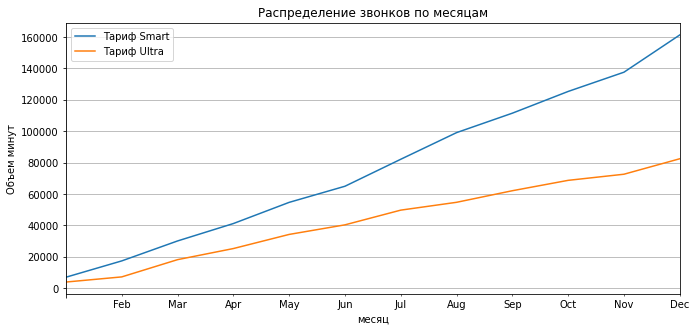

In [65]:
ax = (report
     .pivot_table(index='month', columns='tariff',aggfunc={'duration_round':sum})
     .plot(y='duration_round', figsize=(11, 5), grid=True)
) 

ax.legend(["Тариф Smart", "Тариф Ultra"]);
ax.set_title('Распределение звонков по месяцам');
ax.set_xlabel('месяц');
ax.set_ylabel('Объем минут');
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');




In [66]:
report.groupby('month')[['duration_round']].agg('mean')

,duration_round
month,
2018-01-01,21.568
2018-02-01,48.910
2018-03-01,96.302
2018-04-01,132.620
2018-05-01,177.620
2018-06-01,210.360
2018-07-01,263.492
2018-08-01,307.396
2018-09-01,346.950


In [67]:
report.groupby('tariff')[['mb_used_round']].agg('sum')

,mb_used_round
tariff,
smart,36174861.0
ultra,19194598.0


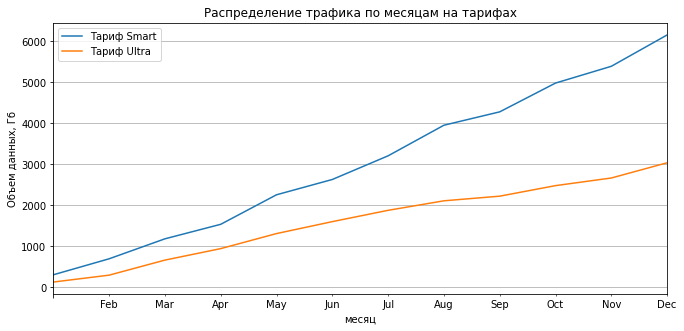

In [68]:
ax = (report
         .pivot_table(index='month', columns='tariff',aggfunc={'Gb_used':sum})
         .plot(y='Gb_used', figsize=(11, 5), grid=True)
) 


ax.legend(["Тариф Smart", "Тариф Ultra"]);
ax.set_title('Распределение трафика по месяцам на тарифах');
ax.set_xlabel('месяц');
ax.set_ylabel('Объем данных, Гб');
ax.set_xticks(ax.get_xticks().tolist())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');


суммарные мегабайты по тарифам

In [69]:
report.groupby('tariff')[['mess']].agg('sum')

,mess
tariff,
smart,74413
ultra,48623


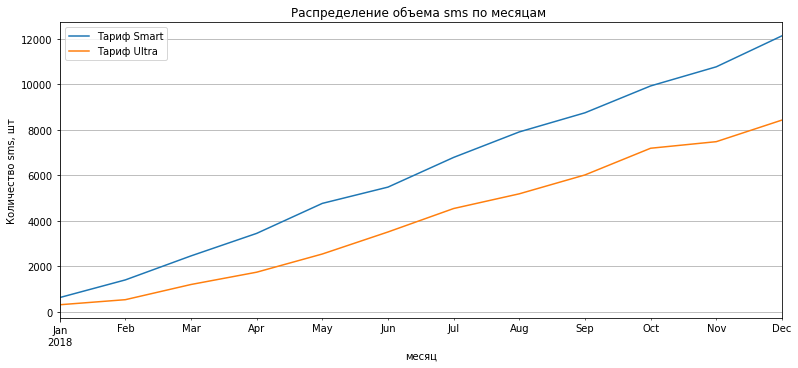

In [70]:

(report
     .pivot_table(index='month', columns='tariff',aggfunc={'mess':sum})
     .plot(y='mess', figsize=(11, 5), grid=True)
) 
plt.tight_layout();
plt.title("Распределение объема sms по месяцам ");
plt.legend(["Тариф Smart", "Тариф Ultra"]);
plt.xlabel("месяц");
plt.ylabel("Количество sms, шт");

Выручка тарифов по тарифам

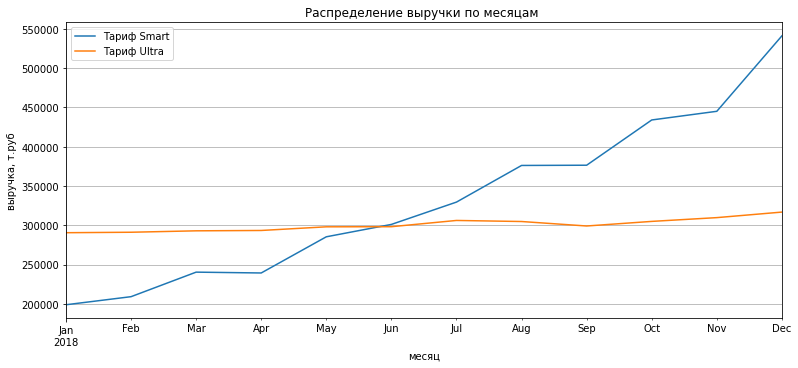

In [71]:
(report
     .pivot_table(index='month', columns='tariff',aggfunc={'revenue':sum})
     .plot( y='revenue', figsize=(11, 5), grid=True)
) ;
plt.tight_layout();
plt.title("Распределение выручки по месяцам ");
plt.legend(["Тариф Smart", "Тариф Ultra"]);
plt.xlabel("месяц");
plt.ylabel("выручка, т.руб");

Выручка от тарифа Smart растет примерно линейно, в то время как выручка от тарифа Ultra почти не растет. Для увеличения прибыли выгоднее предлагать Ultra, а много ли пользуются тарифом Смарт

## 3.2 Гистограммы
<a id="hist"></a>

== Минуты ==

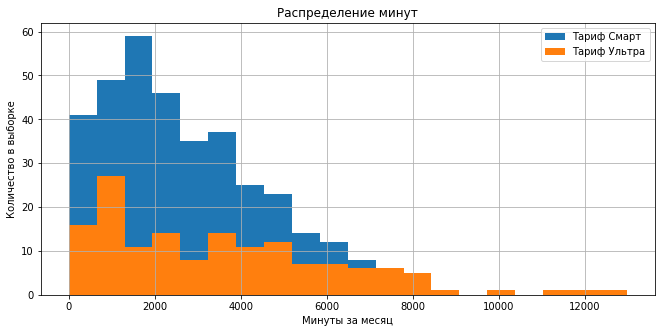

In [72]:
ax = (report
         .pivot_table(index='user_id', columns='tariff',aggfunc={'duration_round':sum})
         .plot.hist(y='duration_round', figsize=(11, 5), grid=True, bins=20)
) 

plt.title("Распределение минут");
plt.legend(["Тариф Смарт", "Тариф Ультра"]);
plt.xlabel("Минуты за месяц");
plt.ylabel("Количество в выборке");
plt.show()

ассиметричное  нормальное распределение

== Мегабайты ==

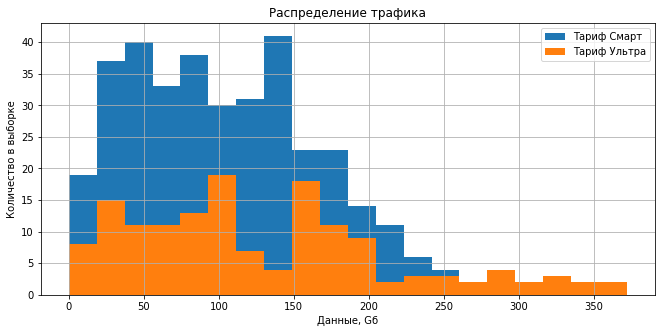

In [73]:
ax = (report
         .pivot_table(index='user_id', columns='tariff',aggfunc={'Gb_used':sum})
         .plot.hist(y='Gb_used', figsize=(11, 5), grid=True, bins=20)
) 
plt.title("Распределение трафика");
plt.legend(["Тариф Смарт", "Тариф Ультра"]);
plt.xlabel("Данные, Gб");
plt.ylabel("Количество в выборке");
plt.show()

 немного ассиметричное нормальное распределение


== SMS ==

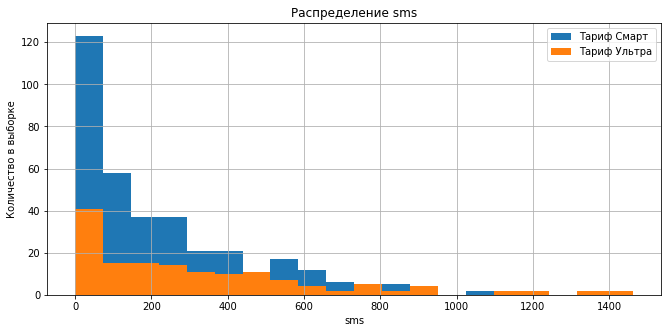

In [74]:
ax = (report
         .pivot_table(index='user_id', columns='tariff',aggfunc={'mess':sum})
         .plot.hist(y='mess', figsize=(11, 5), grid=True, bins=20)
) 
plt.title("Распределение sms");
plt.legend(["Тариф Смарт", "Тариф Ультра"]);
plt.xlabel("sms");
plt.ylabel("Количество в выборке");
plt.show()

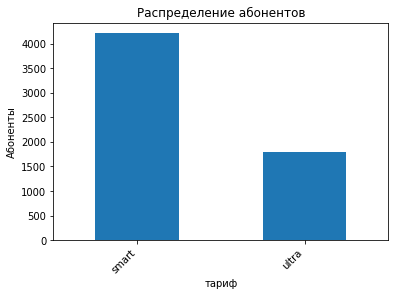

In [75]:
ax = report.groupby('tariff')['tariff'].count().plot.bar()

#ax.legend(["");
ax.set_title('Распределение абонентов');
ax.set_xlabel('тариф');
ax.set_ylabel('Абоненты');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

Смарт используют 75% абонентов

Тариф Смарт используют активные абонеты. Количество смс, трафик и объем разговоромв больше чем на тарифе Ultra

## 3.3 Расчет дисперсий
<a id="sigma"></a>

Дисперсия, среднее, стандартное отклоение `Gb_used` тарифа SMART

In [76]:
np.var(report.query('tariff=="smart"')['Gb_used'])

84.21952490239528

In [77]:
report.query('tariff=="smart"')['Gb_used'].mean()

8.657407407407407

In [78]:
np.std(report.query('tariff=="smart"')['Gb_used'])

9.177119640845666

Дисперсия, среднее, стандартное отклоение `Gb_used` тарифа ULTRA

In [79]:
np.var(report.query('tariff=="ultra"')['Gb_used'])

147.8943900800264

In [80]:
report.query('tariff=="ultra"')['Gb_used'].mean()

10.756711409395972

In [81]:
np.std(report.query('tariff=="ultra"')['Gb_used'])

12.161183745015384

Дисперсия, среднее, стандартное отклоение `duration_round` тарифа SMART

In [82]:
np.var(report.query('tariff=="smart"')['duration_round'])

62677.19710535132

In [83]:
report.query('tariff=="smart"')['duration_round'].mean()

221.1721272554606

In [84]:
np.std(report.query('tariff=="smart"')['duration_round'])

250.35414337564163

Дисперсия, среднее, стандартное отклоение `duration_round` тарифа ULTRA

In [85]:
np.var(report.query('tariff=="ultra"')['duration_round'])

124129.01718391065

In [86]:
report.query('tariff=="ultra"')['duration_round'].mean()

290.1140939597315

In [87]:
np.std(report.query('tariff=="ultra"')['duration_round'])

352.3194816979479

Дисперсия, среднее, стандартное отклоение `messages` тарифа SMART

In [88]:
np.var(report.query('tariff=="smart"')['mess'])

699.1589901304011

In [89]:
report.query('tariff=="smart"')['mess'].mean()

17.66690408357075

In [90]:
np.std(report.query('tariff=="smart"')['mess'])

26.44161474135801

Дисперсия, среднее, стандартное отклоение `messages` тарифа ULTRA

In [91]:
np.var(report.query('tariff=="ultra"')['mess'])

1860.5389581425263

In [92]:
report.query('tariff=="ultra"')['mess'].mean()

27.19407158836689

In [93]:
np.std(report.query('tariff=="ultra"')['mess'])

43.13396524947047

In [94]:
np.var(report.query('tariff=="ultra"')['revenue'])

82594.61144768253

In [95]:
np.var(report.query('tariff=="smart"')['revenue'])

494635.05823968555

Дисперсии отличаются на порядок

In [96]:
np.var(report.query(' city == "Москва"')['revenue'])

575237.3877722227

In [97]:
np.var(report.query('"Москва" not in city')['revenue'])

621700.7248373852

In [98]:
abs(np.var(report.query('"Москва" not in city')['revenue']) \
    - np.var(report.query(' city == "Москва"')['revenue']))\
    / np.var(report.query('"Москва" not in city')['revenue'])

0.07473585796013933

Дисперсии отличаются несильно на 7,5%

## Вывод

Тарифом СМАРТ пользуются большинство абонентов. Пользование улугами связи растет как по количеству минут, так и по трафику. Данные распределены нормально можно применять критреии для оценки среднего

# 4. Проверка гипотез
<a id="tesis"></a>

- Нулевая гипотеза средняя выручка пользователей тарифов «Ультра» и «Смарт» одинаковая. Алтернатитвная - выручка тарифа «Смарт» больше
- Нулевая гипотеза средняя выручка пользователей из Москвы равна выручке от пользователей из других регионов, альтернативная, что средняя выручка пользователей Москвы отличается от выручки для пользователей из регионов

##### критический уровень статистической значимости примем 0.05

In [99]:
alpha = .05 

Для проверки  нулевой гипотезы используем Т критерий Стюдента. критерий односторонний. в качестве значений возьмем средние значения

##  4.1 Выручка по тарифам
<a id="tariff"></a>

Формиррование выборок , среднее

In [100]:
Smart = report.query('"smart"  in tariff')['revenue']
Smart_mean = report.query('"smart"  in tariff')['revenue'].mean()
Smart_mean

944.0648148148148

In [101]:
Ultra = report.query('"ultra"  in tariff')['revenue']
Ultra_mean = report.query('"ultra"  in tariff')['revenue'].mean()
Ultra_mean

2016.6946308724832

In [102]:
results = st.ttest_ind(
    Smart, 
    Ultra)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.0
Отвергаем нулевую гипотезу


получается что в среднем тарифы приносят разную выручку. 

##  4.2  Проверка гипозы о равенстве среднего для регионов
<a id="region"></a>

Формиррование выборок , среднее

In [103]:
Moscow = report.query('"Москва"  in city')['revenue']
Moscow_mean = report.query('"Москва"  in city')['revenue'].mean()
Moscow_mean

1252.0976430976432

In [104]:
periphery = report.query('"Москва" not in city')['revenue']
periphery_mean = report.query('"Москва" not in city')['revenue'].mean()
periphery_mean

1266.5750207813799

In [105]:
results = st.ttest_ind(
    Moscow, 
    periphery, 
    equal_var=True)

print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5680892857908313
Не получилось отвергнуть нулевую гипотезу


Несмотря на то, что среднее для Москвы меньше, вероятность 60% получить  для столицы значения равное значению для региона. В среднем Москва и регионы одинаково тратят на связь

Для распределения выручки по тарифам димперии отличются на порядок. Наверно t критерий не очень применим

# 5 Вывод
<a id="resume"></a>


Тарифом Смарт пользуюся 70% абонентов, тариф приносит бОльшую выгоду с среднем, чем тариф Ульта. Тариф Ульта  имеет меньшую дисперсию и содержит меньше выбросов. Тариф смарт пользуются активные абоненты, как для серфинга , так и для звонков. Скорость притока новых клиентов (увеличиени прибыли) выше. Тариф Смарт выгоднее оператору для продвижения на рынке
